In [3]:
import sys
repo_dir = '/home/labs/amit/noamsh/repos/MM_2023'
sys.path.append(repo_dir)

%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

from data_loading.utils import load_dataframe_from_file
# from clustering_search.stability_search import clustering_stability_search

In [5]:
zstat_path = Path("/home/labs/amit/shuangyi/Project_MM3/Atlas/scvi_diff/zstat_Atlas_20240519_full.txt")
zstat_df = load_dataframe_from_file(zstat_path).rename(columns={'Unnamed: 0':"gene_name"}).set_index("gene_name").T
zstat_df

gene_name,CD74,BLOC1S5-TXNDC5,EDNRB,SEL1L3,CST3,XBP1,TPT1,HLA-B,CD79A,FKBP11,...,ZNF346-IT1,ZNF365,ZNF471,ZNF556,ZNF571-AS1,ZNF704,ZNF723,ZNF831,ZNF850,ZNF90P3
z.MARS_Malignant_01-001,-8.832457,-6.781061,6.658195,-5.616929,5.569297,-5.404347,-5.022597,-4.675577,-4.581012,-4.488908,...,0.0000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0
z.MARS_Malignant_01-004,-9.592993,-2.863011,4.500575,-5.340406,-2.515391,-4.863290,-6.309165,-10.213435,-4.602243,-6.213567,...,-0.0099,0.0,0.1089,0.0792,0.000000,0.0000,0.0000,-0.0099,-0.0495,0.0
z.MARS_Malignant_01-005,-1.815924,-3.523979,7.279021,-1.413767,1.612862,-9.432155,-1.171040,-1.594610,-1.568619,-5.086227,...,-0.0297,0.0,-0.0198,0.0495,-0.009900,0.0693,0.0000,-0.0198,-0.0297,0.0
z.MARS_Malignant_01-006,-8.653704,-5.558967,0.201282,-4.610485,-0.200576,-4.093187,-5.290794,-3.100365,-3.812972,-2.288579,...,0.0990,0.0,0.0000,-0.0099,-0.009900,0.0000,0.0000,0.0000,0.0000,0.0
z.MARS_Malignant_01-007,-7.903569,-9.045166,-0.353427,-5.787569,1.339999,-7.271662,-4.222428,-9.046349,-4.680699,-2.800987,...,-0.0198,0.0,0.0000,0.0000,-0.039600,0.0000,0.0000,-0.0198,-0.0198,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z.SPID_Malignant_Trans_RMC002,-7.811062,-2.564384,-0.132302,-3.029637,0.484009,-3.623256,-2.311960,4.468396,-2.744615,-6.581325,...,-0.0297,0.0,0.0000,-0.0693,-0.053707,-0.0198,-0.0495,0.0000,-0.0198,0.0
z.SPID_Malignant_Trans_RMC013,-4.082233,-1.556790,-0.648358,-3.391800,0.780027,-4.285474,-1.919454,2.403295,-3.066274,-5.193151,...,-0.0396,0.0,0.0000,-0.0297,0.089100,0.0000,-0.0594,0.0000,-0.0396,0.0
z.SPID_Malignant_Trans_TLV003,-7.249238,0.907981,7.428174,-4.191256,4.567583,-5.257747,-0.677734,3.864325,-3.244134,0.717163,...,0.1584,0.0,0.0000,-0.0495,-0.039600,-0.0198,-0.0198,-0.0099,-0.0198,0.0
z.SPID_Malignant_Trans_TLV005,-0.900051,-0.509544,1.359323,-1.279388,1.323141,-2.038648,0.448201,2.579755,-1.531632,-0.701970,...,-0.0297,0.0,0.0000,-0.0495,-0.039600,-0.0099,-0.0297,0.0000,-0.0495,0.0


In [6]:
def np_relu(x):
    return np.maximum(x, 0)

In [7]:
def np_relu(x):
    return np.maximum(x, 0)
    
# filtered_genes = zstat_df.columns[((((zstat_df >= 3).sum(axis=0) > 1)) & (np_relu(zstat_df).std() > 0.5))]
filtered_genes = zstat_df.columns[((zstat_df >= 3).sum(axis=0) > 1)]
filtered_zstat_df = zstat_df[filtered_genes]
filtered_zstat_df

gene_name,CD74,BLOC1S5-TXNDC5,EDNRB,SEL1L3,CST3,TPT1,HLA-B,CD79A,THY1,SLAMF7,...,PLAC1,LINC01419,NTRK2,POPDC3,TLR4,TMPRSS11E,TSPAN7,CD8B2,KLRF2,RBP1
z.MARS_Malignant_01-001,-8.832457,-6.781061,6.658195,-5.616929,5.569297,-5.022597,-4.675577,-4.581012,4.502513,-4.161507,...,-0.029700,-0.0198,-0.019800,-0.0198,-0.019800,-0.019800,-0.019800,-0.009900,0.0000,0.000000
z.MARS_Malignant_01-004,-9.592993,-2.863011,4.500575,-5.340406,-2.515391,-6.309165,-10.213435,-4.602243,-0.049500,-2.854540,...,0.108900,-0.0297,-0.039600,0.0000,-0.099000,-0.009900,-0.009900,0.343528,0.0000,0.198000
z.MARS_Malignant_01-005,-1.815924,-3.523979,7.279021,-1.413767,1.612862,-1.171040,-1.594610,-1.568619,-0.053707,-5.563146,...,-0.009900,-0.0198,-0.039600,-0.0099,0.694796,-0.029700,-0.029700,-0.009900,0.0000,0.000000
z.MARS_Malignant_01-006,-8.653704,-5.558967,0.201282,-4.610485,-0.200576,-5.290794,-3.100365,-3.812972,-0.019800,-1.159267,...,-0.009900,-0.0297,-0.009900,-0.0198,0.019800,0.387083,0.711308,-0.019800,0.0000,0.000000
z.MARS_Malignant_01-007,-7.903569,-9.045166,-0.353427,-5.787569,1.339999,-4.222428,-9.046349,-4.680699,-0.019800,-5.687177,...,0.754517,-0.0198,-0.009900,0.0000,2.513900,-0.009900,0.148500,0.610456,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z.SPID_Malignant_Trans_RMC002,-7.811062,-2.564384,-0.132302,-3.029637,0.484009,-2.311960,4.468396,-2.744615,-0.009900,-0.268817,...,0.000000,0.0000,0.261607,-0.0594,-0.079200,-0.019800,0.029700,0.000000,0.0000,-0.059400
z.SPID_Malignant_Trans_RMC013,-4.082233,-1.556790,-0.648358,-3.391800,0.780027,-1.919454,2.403295,-3.066274,-0.009900,-2.059047,...,0.000000,0.0000,2.443619,-0.0396,1.097567,-0.019800,-0.059400,0.000000,-0.0198,-0.049500
z.SPID_Malignant_Trans_TLV003,-7.249238,0.907981,7.428174,-4.191256,4.567583,-0.677734,3.864325,-3.244134,-0.049500,-0.452240,...,-0.009900,0.0000,-0.039600,-0.0594,-0.019800,-0.009900,0.138652,0.000000,0.0000,0.667845
z.SPID_Malignant_Trans_TLV005,-0.900051,-0.509544,1.359323,-1.279388,1.323141,0.448201,2.579755,-1.531632,-0.029700,-0.709701,...,0.000000,0.0000,-0.019800,-0.0594,-0.063607,0.230692,1.133867,0.000000,-0.0099,-0.069300


In [8]:
import pandas as pd
from sklearn.base import ClusterMixin
import warnings
from typing import Dict

import numpy as np
from sklearn.base import ClusterMixin
from sklearn.exceptions import ConvergenceWarning
from sklearn import metrics 
from tqdm import tqdm

from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist

class NMFClustering(ClusterMixin):
    def __init__(self, nmf_model):
        self.model = nmf_model
        self.W = None
        self.H = None

    def _fit(self, X):
        self.W = self.model.fit_transform(X)
        self.H = self.model.components_

    def _predict_clusters(self):
        return self.W.argmax(axis=1)

    def fit_predict(self, X, y=None, **kwargs):
        self._fit(X)

        if isinstance(X, pd.DataFrame):
            clust = pd.Series(self._predict_clusters(), index=X.index)
        else:
            clust = self._predict_clusters()
        return clust
    

def clustering_stability_search(X: pd.DataFrame, clustering_models: Dict[str, ClusterMixin], clustering_metric=None,
                                n_iter=50, f=0.9):
    if clustering_metric is None:
        clustering_metric = metrics.adjusted_rand_score

    all_results = {}
    for model_name, model in tqdm(clustering_models.items()):
        model_results = []
        for i in range(n_iter):
            sample_size = int(len(X) * f)
            sample_ids = list(X.index)
            sample_1 = np.random.choice(sample_ids, size=sample_size, replace=False)
            sample_2 = np.random.choice(sample_ids, size=sample_size, replace=False)

            common_sample = list(set(sample_1).intersection(set(sample_2)))

            X_sub_1 = X.loc[sample_1]
            X_sub_2 = X.loc[sample_2]
            with warnings.catch_warnings():
                warnings.filterwarnings('error')
                try:
                    y_sub_1 = pd.Series(model.fit_predict(X_sub_1), index=sample_1)
                    y_sub_2 = pd.Series(model.fit_predict(X_sub_2), index=sample_2)
                    metric = clustering_metric(y_sub_1[common_sample], y_sub_2[common_sample])
                except ConvergenceWarning:
                    metric = -1

            model_results.append(metric)

        all_results[model_name] = model_results
    return pd.DataFrame(all_results)

def cophenet_corr(X_tranformed: pd.DataFrame):
    orign_dists = pdist(X_trans)
    Z = single(dist)
    coph_dist = cophenet(Z)
    corr_coef = np.corrcoef(orign_dists, coph_dist)
    return corr_coef[0,1]

In [9]:
# params = [{"n_components":k, "max_iter":600, 'init':init} for k in range(3,21) for init in ['nndsvd', 'nndsvdar']]
# nmf_models = [NMF(**param) for param in params]
# cophenet_corr_list = []
# for nmf_model in tqdm(nmf_models):
#     cophenet_corr_list.append(cophenet_corr(nmf_model.fit_transform(np_relu(filtered_zstat_df))))
    

### NMF stability

In [30]:
from sklearn.pipeline import Pipeline

params = [{"n_components":k, "max_iter":800, 'init':init} for k in range(4,12) for init in ['nndsvdar']] # 'nndsvd'
# models = [NMFClustering(NMF(**param)) for param in params]
models = [Pipeline(steps=[("nmf", NMF(**param)),
                          ("agg", AgglomerativeClustering(n_clusters=6))])
          for param in params]
models_dict = {f"{param}": model for model, param in zip(models, params)}

models_dict

{"{'n_components': 4, 'max_iter': 800, 'init': 'nndsvdar'}": Pipeline(steps=[('nmf', NMF(init='nndsvdar', max_iter=800, n_components=4)),
                 ('agg', AgglomerativeClustering(n_clusters=5))]),
 "{'n_components': 5, 'max_iter': 800, 'init': 'nndsvdar'}": Pipeline(steps=[('nmf', NMF(init='nndsvdar', max_iter=800, n_components=5)),
                 ('agg', AgglomerativeClustering(n_clusters=5))]),
 "{'n_components': 6, 'max_iter': 800, 'init': 'nndsvdar'}": Pipeline(steps=[('nmf', NMF(init='nndsvdar', max_iter=800, n_components=6)),
                 ('agg', AgglomerativeClustering(n_clusters=5))]),
 "{'n_components': 7, 'max_iter': 800, 'init': 'nndsvdar'}": Pipeline(steps=[('nmf', NMF(init='nndsvdar', max_iter=800, n_components=7)),
                 ('agg', AgglomerativeClustering(n_clusters=5))]),
 "{'n_components': 8, 'max_iter': 800, 'init': 'nndsvdar'}": Pipeline(steps=[('nmf', NMF(init='nndsvdar', max_iter=800, n_components=8)),
                 ('agg', AgglomerativeClus

In [31]:
search_results = clustering_stability_search(np_relu(filtered_zstat_df), models_dict)
search_results

100%|██████████| 8/8 [00:55<00:00,  6.94s/it]


,"{'n_components': 4, 'max_iter': 800, 'init': 'nndsvdar'}","{'n_components': 5, 'max_iter': 800, 'init': 'nndsvdar'}","{'n_components': 6, 'max_iter': 800, 'init': 'nndsvdar'}","{'n_components': 7, 'max_iter': 800, 'init': 'nndsvdar'}","{'n_components': 8, 'max_iter': 800, 'init': 'nndsvdar'}","{'n_components': 9, 'max_iter': 800, 'init': 'nndsvdar'}","{'n_components': 10, 'max_iter': 800, 'init': 'nndsvdar'}","{'n_components': 11, 'max_iter': 800, 'init': 'nndsvdar'}"
0,0.736226,0.550253,0.336055,0.499401,-1.000000,0.372452,0.555015,0.486050
1,0.593503,0.357046,0.407424,0.514021,0.742307,0.358695,0.404709,0.530442
2,0.509843,0.646326,0.393715,0.617888,0.459497,0.502759,0.321817,0.372919
3,0.883315,0.512654,0.605528,0.581587,0.506767,0.239648,0.339813,0.446894
4,0.645298,0.291103,0.447652,0.538903,0.423562,0.525317,0.586244,0.371583
5,0.600122,0.455356,0.478473,0.427003,0.678696,0.334965,0.519669,0.449750
6,0.424729,0.539243,0.656478,0.912415,0.554488,0.600481,0.352568,0.469257
7,0.812411,0.456977,0.544796,0.380632,0.620471,0.487068,0.388949,0.463412
8,0.807947,0.729399,0.541026,0.503160,0.425726,0.554926,0.610695,0.340941
9,0.655650,0.404887,0.521184,0.385075,0.551200,0.458279,0.453178,0.514439


In [36]:
(search_results == -1).sum()

{'n_components': 4, 'max_iter': 800, 'init': 'nndsvdar'}     0
{'n_components': 5, 'max_iter': 800, 'init': 'nndsvdar'}     1
{'n_components': 6, 'max_iter': 800, 'init': 'nndsvdar'}     0
{'n_components': 7, 'max_iter': 800, 'init': 'nndsvdar'}     0
{'n_components': 8, 'max_iter': 800, 'init': 'nndsvdar'}     2
{'n_components': 9, 'max_iter': 800, 'init': 'nndsvdar'}     1
{'n_components': 10, 'max_iter': 800, 'init': 'nndsvdar'}    1
{'n_components': 11, 'max_iter': 800, 'init': 'nndsvdar'}    0
dtype: int64

In [37]:
cols_as_ser = [search_results[col].replace(-1, np.nan) for col in search_results.columns]
cols_as_dfs = []
for ser in cols_as_ser:
    model_name = ser.name
    df = pd.DataFrame(ser.rename("score"))
    df["model_name"] = model_name
    cols_as_dfs.append(df)
df = pd.concat(cols_as_dfs)
df["model_name"] = df["model_name"].apply(lambda x: x.replace("\n", " "))

/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



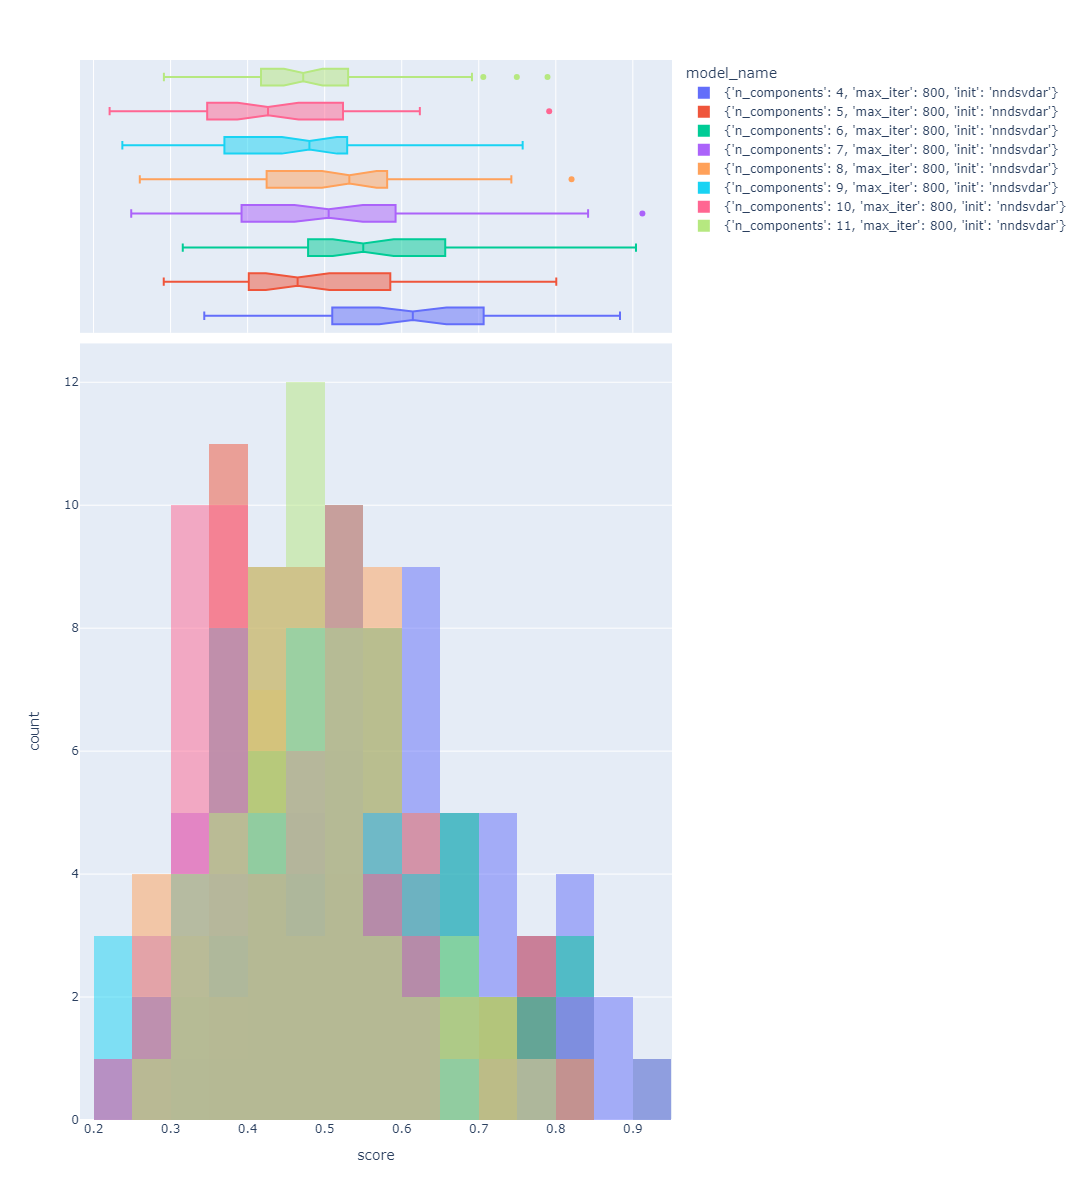

In [38]:
import plotly.express as px
fig = px.histogram(df, x="score", color="model_name", barmode="overlay", marginal="box" ,width=800, height=1200)
fig.show()

In [34]:
import json
df["n_components"] = df["model_name"].apply(lambda x: json.loads(x.replace("'","\""))["n_components"])
df

,score,model_name,n_components
0,0.736226,"{'n_components': 4, 'max_iter': 800, 'init': '...",4
1,0.593503,"{'n_components': 4, 'max_iter': 800, 'init': '...",4
2,0.509843,"{'n_components': 4, 'max_iter': 800, 'init': '...",4
3,0.883315,"{'n_components': 4, 'max_iter': 800, 'init': '...",4
4,0.645298,"{'n_components': 4, 'max_iter': 800, 'init': '...",4
...,...,...,...
45,0.552882,"{'n_components': 11, 'max_iter': 800, 'init': ...",11
46,0.460986,"{'n_components': 11, 'max_iter': 800, 'init': ...",11
47,0.512530,"{'n_components': 11, 'max_iter': 800, 'init': ...",11
48,0.545277,"{'n_components': 11, 'max_iter': 800, 'init': ...",11


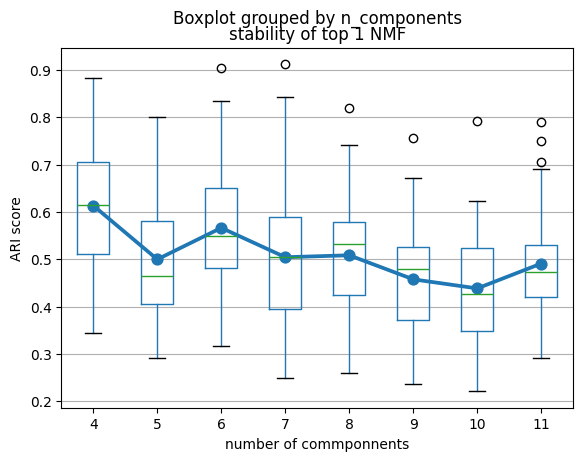

In [35]:
import seaborn as sns
ax = df.boxplot(column='score', by='n_components', showfliers=True, 
                positions=range(df.n_components.unique().shape[0]))
sns.pointplot(x='n_components', y='score', data=df.groupby('n_components', as_index=False)['score'].mean(), ax=ax)
ax.set_title('stability of top 1 NMF');
ax.set_xlabel("number of commponnents");
ax.set_ylabel("ARI score");

#### vis NMF

In [67]:
n_components=8
nmf_model = NMF(n_components=n_components, max_iter=600)

W = nmf_model.fit_transform(np_relu(filtered_zstat_df))
H = nmf_model.components_
W.shape, H.shape


((185, 8), (8, 622))

In [68]:
p_ids = [p_id.replace("z.", "").split("_Malignant_")[1] for p_id in filtered_zstat_df.index]
methods = [p_id.replace("z.", "").split("_Malignant_")[0] for p_id in filtered_zstat_df.index]

nmf_df = pd.DataFrame(W, columns=[f"nmf_{i}" for i in range(W.shape[1])])
nmf_df["method"] = methods
nmf_df["p_id"] = p_ids

In [69]:
NMF_genes = pd.DataFrame(H.T, index=filtered_zstat_df.columns, columns=[f"nmf_{i}" for i in range(W.shape[1])])
max_genes = {}
for col in NMF_genes.columns:
    max_genes[col] = NMF_genes[col].sort_values(ascending=False).head(10)

max_genes

{'nmf_0': gene_name
 CCND1        360.848166
 LINC01781    154.087104
 FRZB         150.822563
 MS4A1         76.865703
 VPREB3        69.418180
 BTG1          67.092543
 LAPTM5        65.856612
 ITM2B         64.273605
 ALOX5AP       63.602419
 FCRLA         62.588570
 Name: nmf_0, dtype: float64,
 'nmf_1': gene_name
 RACK1       84.044456
 UBA52       81.086360
 EEF1B2      80.480757
 EEF1A1P5    76.171184
 GAS5        73.462534
 EEF2        61.572956
 NPM1        59.627879
 NACA        54.654135
 FAU         54.280527
 BTF3        49.226743
 Name: nmf_1, dtype: float64,
 'nmf_2': gene_name
 MIF         20.640062
 GAPDH       19.842598
 FTL         16.670689
 UBA52       16.006576
 UQCR11      15.517939
 PPIA        15.454140
 LAMP5       14.027059
 TXN         13.771037
 NDUFA4      13.600126
 HIST1H1C    12.999131
 Name: nmf_2, dtype: float64,
 'nmf_3': gene_name
 ITGB7     14.510956
 CCND2     13.722578
 SPP1      10.376631
 MAF        8.470593
 CD59       7.658008
 LTB        6.8

In [70]:
from omegaconf import OmegaConf
import anndata as ad
import scanpy as sc

config_path = Path(repo_dir, 'config.yaml')
conf = OmegaConf.load(config_path)

load_ts_iso = "2024-05-19"
data_version = "20240515"

In [75]:
annotated_filtered_only_pc_path = Path(conf.outputs.output_dir, f"adata_with_scvi_annot_pred_data_v_{data_version}_ts_{load_ts_iso}_only_pc_annotated_filtered.h5ad")
non_noisy_malignant = ad.read_h5ad(annotated_filtered_only_pc_path)
non_noisy_malignant

AnnData object with n_obs × n_vars = 165001 × 3862
    obs: 'Amp.Batch.ID', 'Seq.Batch.ID', 'Batch.Set.ID', 'Included', 'Tissue', 'Gating', 'Total.PC', 'Total.NonPC', 'Initial.Code', 'Disease', 'Time', 'Project', 'Cohort', 'Weizmann.Code', 'Hospital.Code', 'Clinical.Data', 'Method', 'cID', 'super_Population', 'Populations', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'Predicted', 'number_of_diffrent_patients_in_nighborhood', 'pc_close_other_pc', 'pc_annotation', 'one_pateint_in_nighborhood', 'small_pateint_in_nighborhood', 'log_total_counts', 'noisy_malignant', 'noisy_malignant_by_umi'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Cohort_colors', 'Method_colors', 'PC_nighbors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'one_pateint_in_nighborhood_colors', 'pc', 'pc_annotation_colors', 'p

In [72]:
non_noisy_malignant.obs = non_noisy_malignant.obs.merge(nmf_df, how='left', left_on=['Hospital.Code', 'Method'], right_on=['p_id', 'method'])

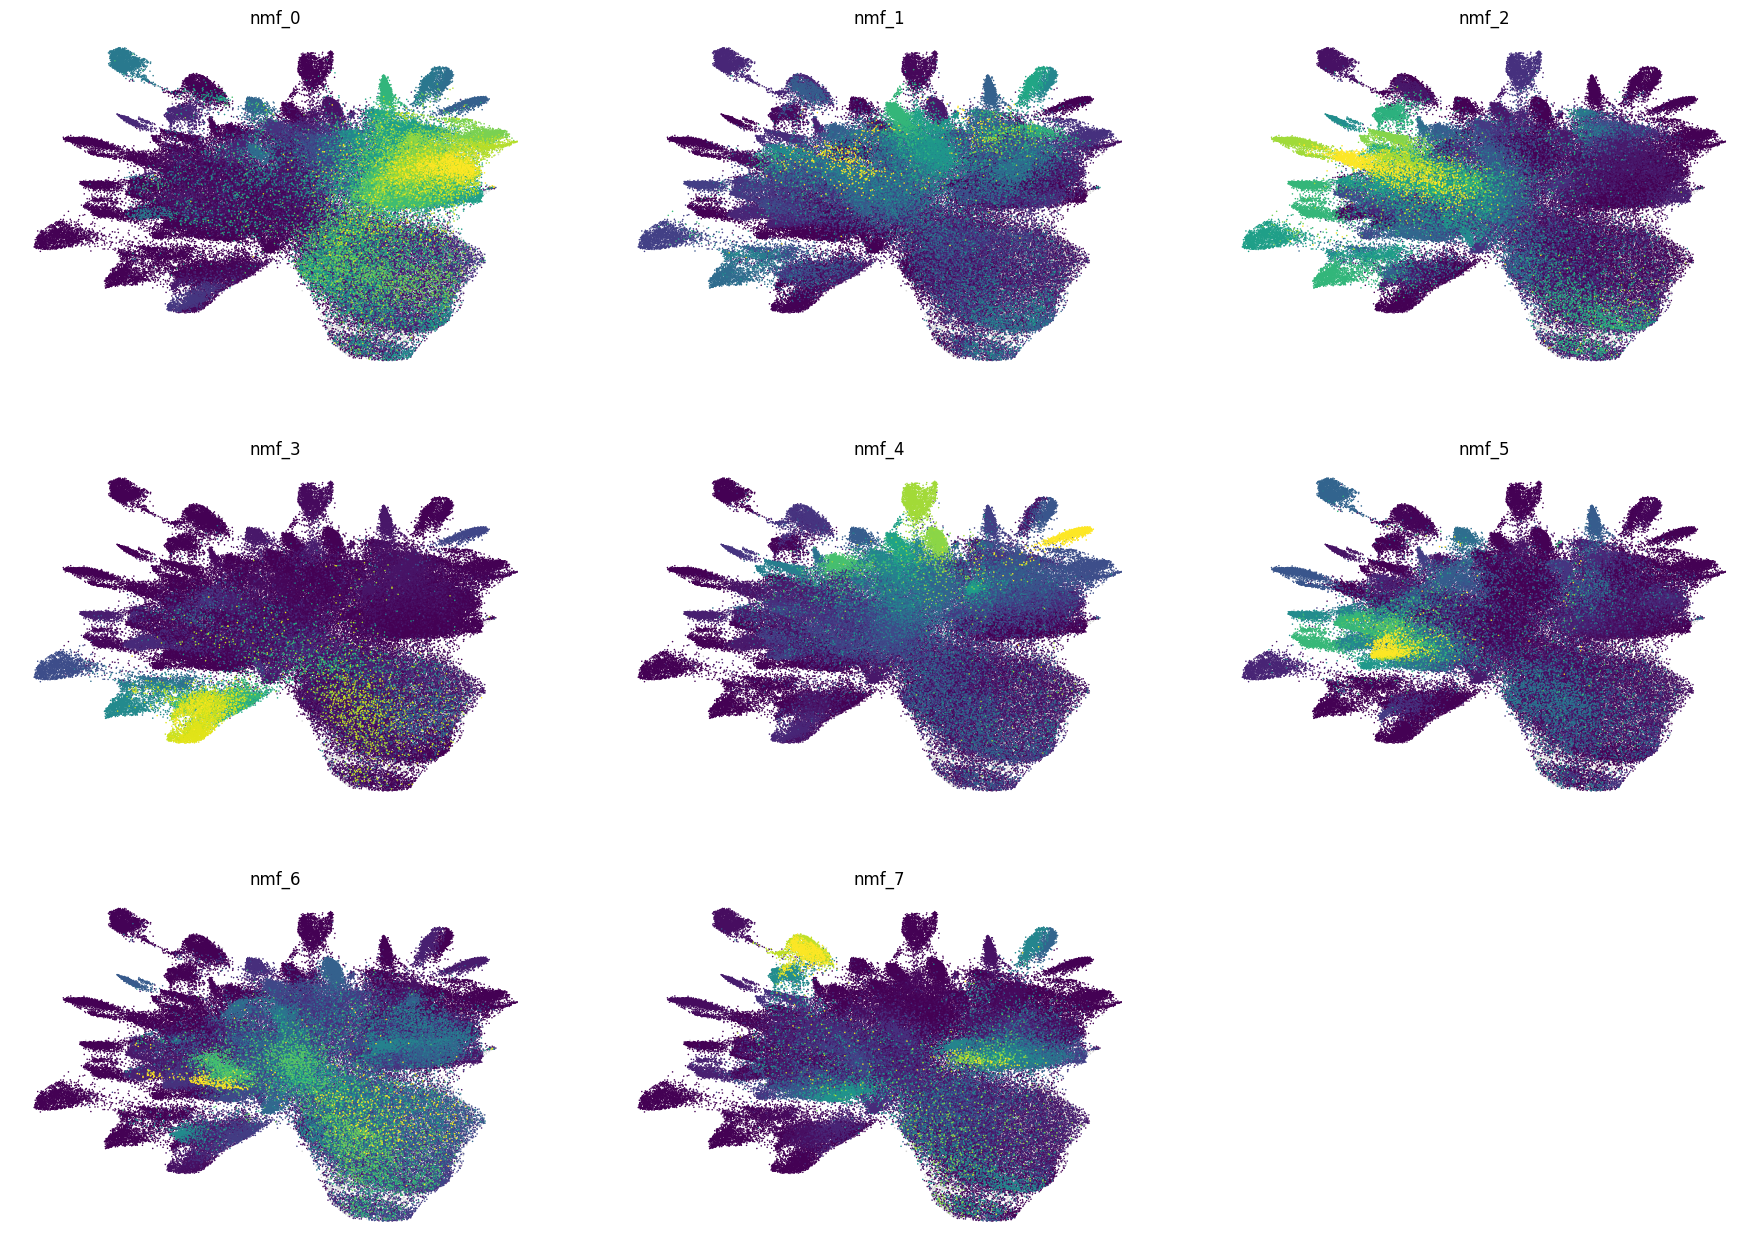

In [73]:
sc.pl.umap(non_noisy_malignant, color=[f"nmf_{i}" for i in range(W.shape[1])], ncols=3 , size=5, frameon=False, colorbar_loc=None)

In [78]:
annotated_filtered_only_pc_path

PosixPath('/home/labs/amit/noamsh/repos/MM_2023/outputs/adata_with_scvi_annot_pred_data_v_20240515_ts_2024-05-19_only_pc_annotated_filtered.h5ad')

/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/gseapy/plot.py:694: FutureWarning:

The 'method' keyword in Series.replace is deprecated and will be removed in a future version.

/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/gseapy/plot.py:694: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/gseapy/plot.py:694: FutureWarning:

The 'method' keyword in Series.replace is deprecated and will be removed in a futur

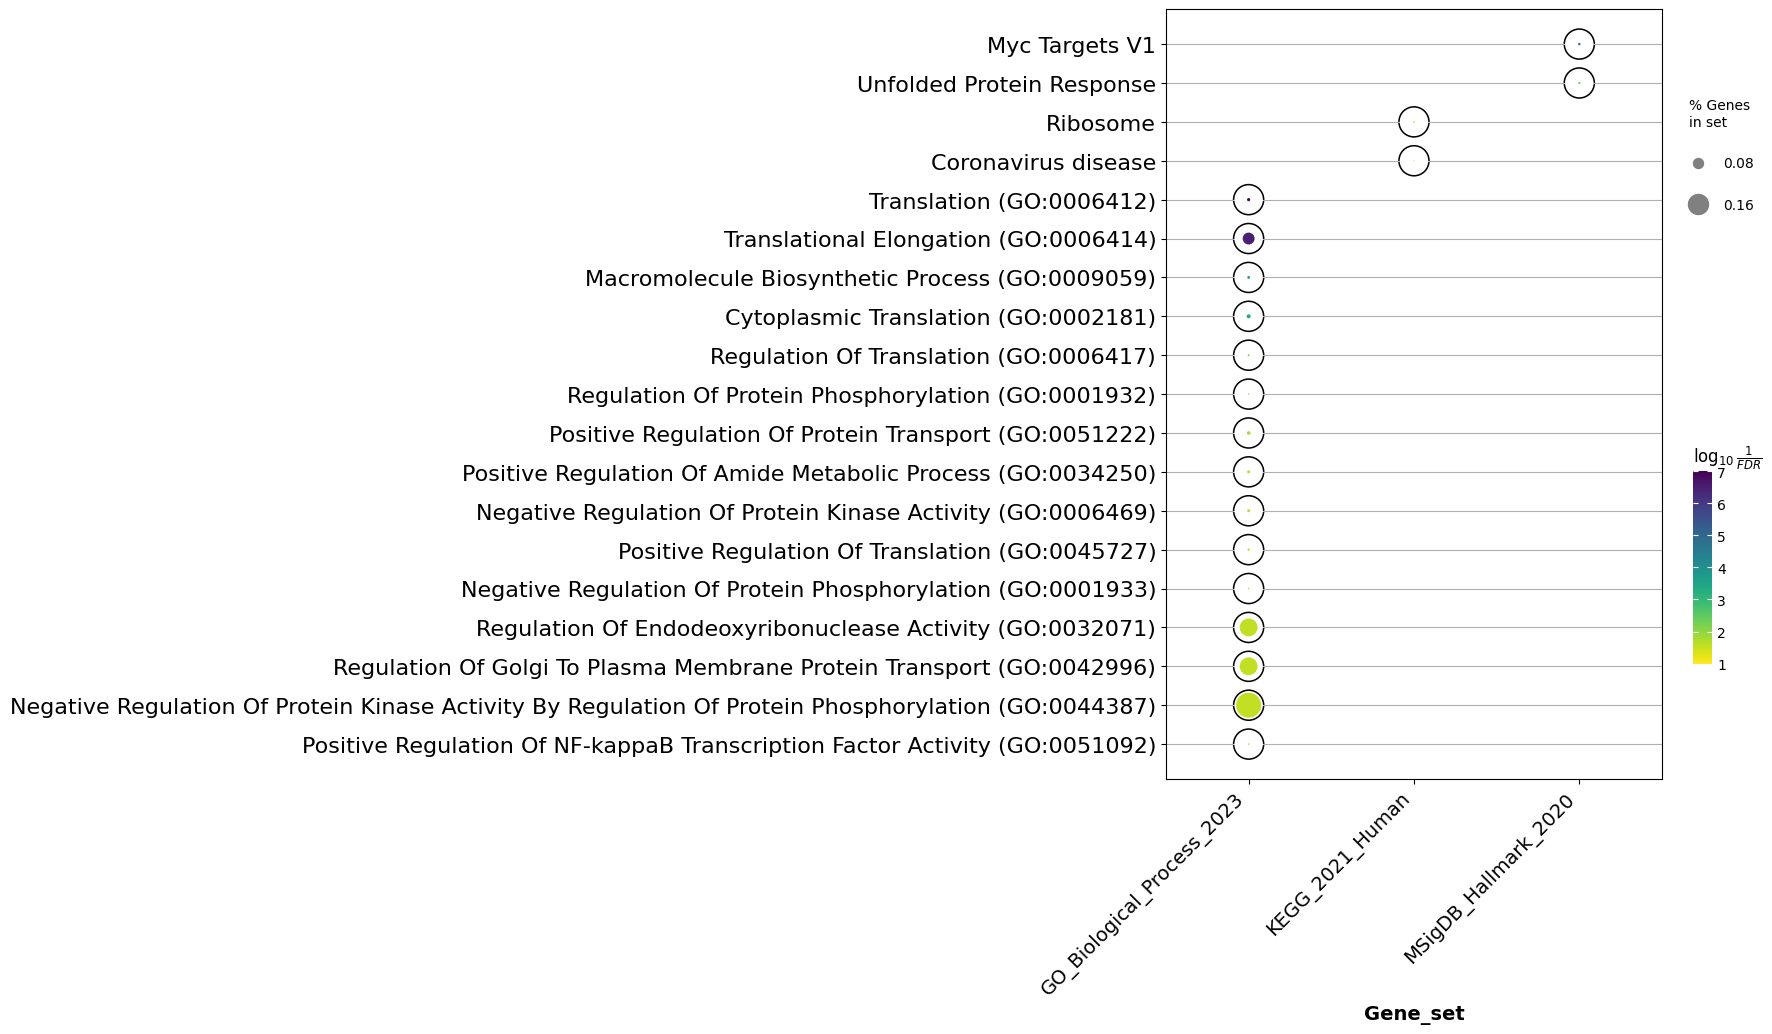

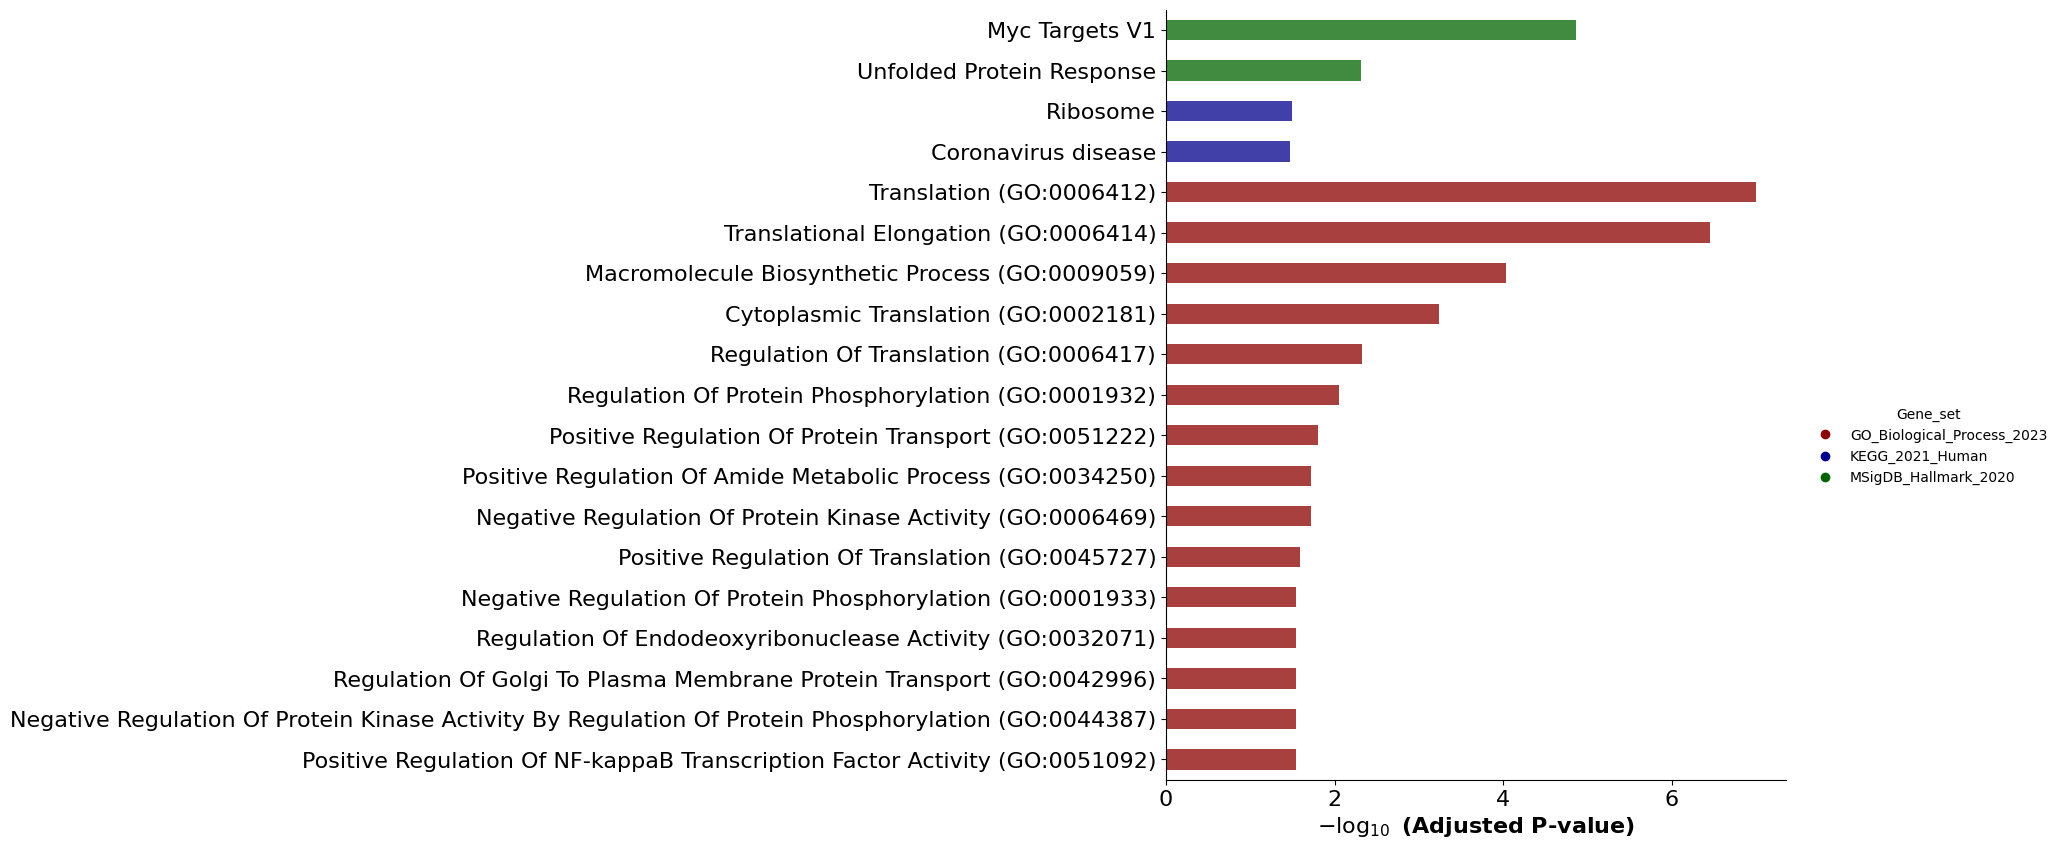

In [65]:
import gseapy
names = gseapy.get_library_name(organism='Human')
names[:20]
gene_sets=[#'Panther_2016',
'MSigDB_Hallmark_2020',
'KEGG_2021_Human','GO_Biological_Process_2023']

gene_list = list(max_genes['nmf_0'].index)
enr = gseapy.enrichr(gene_list=gene_list,
                 gene_sets=gene_sets,
                 organism='human',
                 outdir=None,#'test/enrichr_go',
                 #cutoff=0.5
                )

from gseapy.plot import dotplot, barplot

# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=15,
              top_term=15,
              figsize=(8,10),
              title = "",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )


ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set',
              size=15,
              top_term=15,
              figsize=(8,10),
              title = '',
              color=['darkred', 'darkblue','darkgreen'] # set colors for group
             )

#barplot also
enr.results

### clustering above NMF

In [82]:
list(range(4, 30, 2))

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

In [83]:
nmf_chosen_parmas = {"n_components":8, "max_iter":600, 'init':'nndsvdar'}
params = [{"n_clusters":k, 'metric':metric, 'linkage': linkage} for k in range(4, 30, 2) for linkage in ['single'] for metric in ['euclidean']]
models = [make_pipeline(FunctionTransformer(np_relu), NMF(**nmf_chosen_parmas), 
                        AgglomerativeClustering(**param)) for param in params]
models_dict = {f"{param}": model for model, param in zip(models, params)}

models_dict

{"{'n_clusters': 4, 'metric': 'euclidean', 'linkage': 'single'}": Pipeline(steps=[('functiontransformer',
                  FunctionTransformer(func=<function np_relu at 0x2b164ae1f4c0>)),
                 ('nmf', NMF(init='nndsvdar', max_iter=600, n_components=6)),
                 ('agglomerativeclustering',
                  AgglomerativeClustering(linkage='single', n_clusters=4))]),
 "{'n_clusters': 6, 'metric': 'euclidean', 'linkage': 'single'}": Pipeline(steps=[('functiontransformer',
                  FunctionTransformer(func=<function np_relu at 0x2b164ae1f4c0>)),
                 ('nmf', NMF(init='nndsvdar', max_iter=600, n_components=6)),
                 ('agglomerativeclustering',
                  AgglomerativeClustering(linkage='single', n_clusters=6))]),
 "{'n_clusters': 8, 'metric': 'euclidean', 'linkage': 'single'}": Pipeline(steps=[('functiontransformer',
                  FunctionTransformer(func=<function np_relu at 0x2b164ae1f4c0>)),
                 ('nmf', NMF(in

In [84]:
search_results = clustering_stability_search(np_relu(filtered_zstat_df).T, models_dict, n_iter=100, clustering_metric=metrics.adjusted_mutual_info_score) # , clustering_metric=metrics.adjusted_mutual_info_score
search_results

100%|██████████| 13/13 [02:00<00:00,  9.26s/it]


,"{'n_clusters': 4, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 6, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 8, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 10, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 12, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 14, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 16, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 18, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 20, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 22, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 24, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 26, 'metric': 'euclidean', 'linkage': 'single'}","{'n_clusters': 28, 'metric': 'euclidean', 'linkage': 'single'}"
0,1.000000,1.000000,0.937400,0.894011,0.869844,1.000000,0.813303,0.743407,0.793683,0.922920,0.804429,0.880693,0.876662
1,-1.000000,0.607914,0.881962,0.893627,0.945579,0.914846,0.644519,0.968263,0.811173,0.789185,0.843398,0.918311,0.798727
2,1.000000,0.616572,0.930545,0.893997,0.880920,0.826458,0.937704,0.882285,0.809561,0.895171,0.829483,0.832412,0.795496
3,1.000000,1.000000,0.869878,1.000000,0.832255,0.641109,0.929015,0.968261,1.000000,0.838638,0.900332,0.835539,0.904510
4,0.584808,0.797854,0.831191,0.895949,0.918668,0.621723,0.839660,0.867790,0.971329,0.911462,0.774612,0.815723,0.840044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,0.449394,0.943017,1.000000,0.837395,0.884318,1.000000,0.970035,0.938467,0.785319,0.855739,0.887971,0.875377
96,1.000000,0.904798,0.916110,1.000000,0.862029,-1.000000,0.892869,0.848694,0.863941,0.898720,0.913822,0.772604,0.831891
97,1.000000,0.840031,1.000000,1.000000,0.823781,0.663825,0.796619,0.910444,0.898499,0.900226,0.877208,0.825672,0.863385
98,0.620481,0.689572,0.881968,0.903778,0.633854,0.875856,0.839648,0.848704,0.819997,0.793683,0.931349,0.706887,0.720239


In [85]:
cols_as_ser = [search_results[col].replace(-1, np.nan) for col in search_results.columns]
cols_as_dfs = []
for ser in cols_as_ser:
    model_name = ser.name
    df = pd.DataFrame(ser.rename("score"))
    df["model_name"] = model_name
    cols_as_dfs.append(df)
df = pd.concat(cols_as_dfs)
df["model_name"] = df["model_name"].apply(lambda x: x.replace("\n", " "))

In [86]:
import json
df["n_components"] = df["model_name"].apply(lambda x: json.loads(x.replace("'","\""))["n_clusters"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '4'),
  Text(1, 0, '6'),
  Text(2, 0, '8'),
  Text(3, 0, '10'),
  Text(4, 0, '12'),
  Text(5, 0, '14'),
  Text(6, 0, '16'),
  Text(7, 0, '18'),
  Text(8, 0, '20'),
  Text(9, 0, '22'),
  Text(10, 0, '24'),
  Text(11, 0, '26'),
  Text(12, 0, '28')])

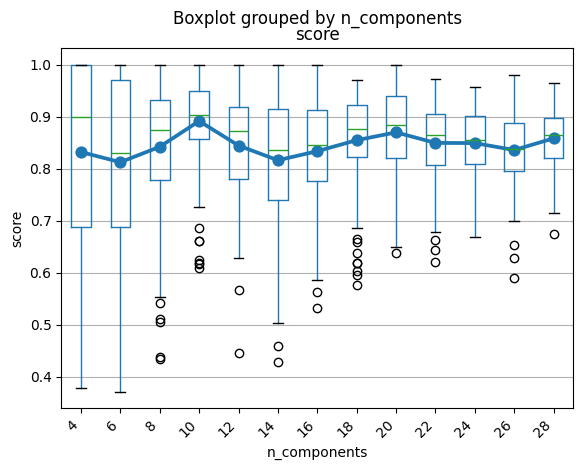

In [87]:
import matplotlib.pyplot as plt
ax = df.boxplot(column='score', by='n_components', showfliers=True, 
                positions=range(df.n_components.unique().shape[0]))
sns.pointplot(x='n_components', y='score', data=df.groupby('n_components', as_index=False)['score'].mean(), ax=ax)
plt.xticks(rotation=45, ha='right')